## Import libraries

In [1]:
import warnings
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
warnings.filterwarnings('ignore')

## Import data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Data Analysis and Data Preprocessing

## Handling outliers

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.describe(include="O")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


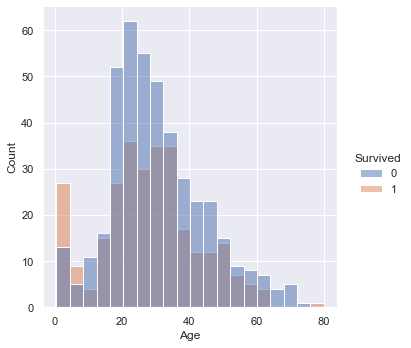

In [6]:
sns.set(rc={'figure.figsize':(40,10)})
sns.displot(data=train, x="Age", hue='Survived')

In [7]:
train['Fare'] = np.log1p(train['Fare'])
test['Fare'] = np.log1p(test['Fare'])

In [8]:
from collections import Counter
def detect_outliers(df,n,features):
    outlier_indices = []
    
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than n outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers

# Delete the sample if it contains any outlier
out = detect_outliers(train, 0, ['Fare','Age'])
train.drop(out, axis = 0, inplace = True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 860 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  860 non-null    int64  
 1   Survived     860 non-null    int64  
 2   Pclass       860 non-null    int64  
 3   Name         860 non-null    object 
 4   Sex          860 non-null    object 
 5   Age          693 non-null    float64
 6   SibSp        860 non-null    int64  
 7   Parch        860 non-null    int64  
 8   Ticket       860 non-null    object 
 9   Fare         860 non-null    float64
 10  Cabin        188 non-null    object 
 11  Embarked     858 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 87.3+ KB


## Handling missing values

In [9]:
test1 = test.copy()
test1['Survived'] = np.nan
data = pd.concat([train, test1]).reset_index(drop = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278 entries, 0 to 1277
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1278 non-null   int64  
 1   Survived     860 non-null    float64
 2   Pclass       1278 non-null   int64  
 3   Name         1278 non-null   object 
 4   Sex          1278 non-null   object 
 5   Age          1025 non-null   float64
 6   SibSp        1278 non-null   int64  
 7   Parch        1278 non-null   int64  
 8   Ticket       1278 non-null   object 
 9   Fare         1277 non-null   float64
 10  Cabin        279 non-null    object 
 11  Embarked     1276 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 119.9+ KB


In [10]:
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)
pd.crosstab(data['Title'], data.Sex)

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Lady,1,0
Major,0,2
Master,0,61


In [11]:
col_rep = ['Capt', 'Col', 'Countess', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir']
data['Title'].replace(col_rep, 'Rare', inplace = True)
data['Title'].replace(['Mlle', 'Ms'], 'Miss', inplace = True)
data['Title'].replace(['Mme'], 'Mrs', inplace = True)
pd.crosstab(data['Title'], data['Sex'])

Sex,female,male
Title,,
Master,0,61
Miss,257,0
Mr,0,736
Mrs,196,0
Rare,4,24


In [12]:
data.groupby('Title').mean()['Survived']

Title
Master    0.575000
Miss      0.691011
Mr        0.157258
Mrs       0.790323
Rare      0.363636
Name: Survived, dtype: float64

In [13]:
index_NaN_age = list(data["Age"][data["Age"].isnull()].index)
for i in index_NaN_age :
    age_pred = np.nanmedian(data["Age"][data['Title'] == data.iloc[i]["Title"]])
    data.loc[i, 'Age'] = age_pred
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278 entries, 0 to 1277
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1278 non-null   int64  
 1   Survived     860 non-null    float64
 2   Pclass       1278 non-null   int64  
 3   Name         1278 non-null   object 
 4   Sex          1278 non-null   object 
 5   Age          1278 non-null   float64
 6   SibSp        1278 non-null   int64  
 7   Parch        1278 non-null   int64  
 8   Ticket       1278 non-null   object 
 9   Fare         1277 non-null   float64
 10  Cabin        279 non-null    object 
 11  Embarked     1276 non-null   object 
 12  Title        1278 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 129.9+ KB


In [14]:
# The missing value of "Fare" feature (mean padding)
# Here, I use samples with the same "Pclass" to fill in the missing values of "Fare" feature,
# since samples with the same ticket class have similar fares.
# Nevertheless, "Fare" feature has only one missing value, so no matter how it is filled,
# it will have little impact on prediction.
index_NaN_fare = list(data["Fare"][data["Fare"].isnull()].index)
for i in index_NaN_fare:
    fare_pred = np.nanmean(data["Fare"][data['Pclass'] == data.iloc[i]["Pclass"]])
    data.loc[i, 'Fare'] = fare_pred
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278 entries, 0 to 1277
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1278 non-null   int64  
 1   Survived     860 non-null    float64
 2   Pclass       1278 non-null   int64  
 3   Name         1278 non-null   object 
 4   Sex          1278 non-null   object 
 5   Age          1278 non-null   float64
 6   SibSp        1278 non-null   int64  
 7   Parch        1278 non-null   int64  
 8   Ticket       1278 non-null   object 
 9   Fare         1278 non-null   float64
 10  Cabin        279 non-null    object 
 11  Embarked     1276 non-null   object 
 12  Title        1278 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 129.9+ KB


In [15]:
# The missing value of "Embarked" feature (mode padding)
from scipy import stats

index_NaN_embarked = list(data["Embarked"][data["Embarked"].isnull()].index)
for i in index_NaN_embarked :
    embarked_pred = stats.mode(data["Embarked"][data['Pclass'] == data.iloc[i]["Pclass"]])[0][0]
    data.loc[i, 'Embarked'] = embarked_pred
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278 entries, 0 to 1277
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1278 non-null   int64  
 1   Survived     860 non-null    float64
 2   Pclass       1278 non-null   int64  
 3   Name         1278 non-null   object 
 4   Sex          1278 non-null   object 
 5   Age          1278 non-null   float64
 6   SibSp        1278 non-null   int64  
 7   Parch        1278 non-null   int64  
 8   Ticket       1278 non-null   object 
 9   Fare         1278 non-null   float64
 10  Cabin        279 non-null    object 
 11  Embarked     1278 non-null   object 
 12  Title        1278 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 129.9+ KB


In [16]:
# Delete useless columns
data.drop(['PassengerId','Name', 'Cabin','Ticket'], axis=1,inplace=True)  
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278 entries, 0 to 1277
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  860 non-null    float64
 1   Pclass    1278 non-null   int64  
 2   Sex       1278 non-null   object 
 3   Age       1278 non-null   float64
 4   SibSp     1278 non-null   int64  
 5   Parch     1278 non-null   int64  
 6   Fare      1278 non-null   float64
 7   Embarked  1278 non-null   object 
 8   Title     1278 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 90.0+ KB


## Data Merging

<AxesSubplot:xlabel='Title', ylabel='count'>

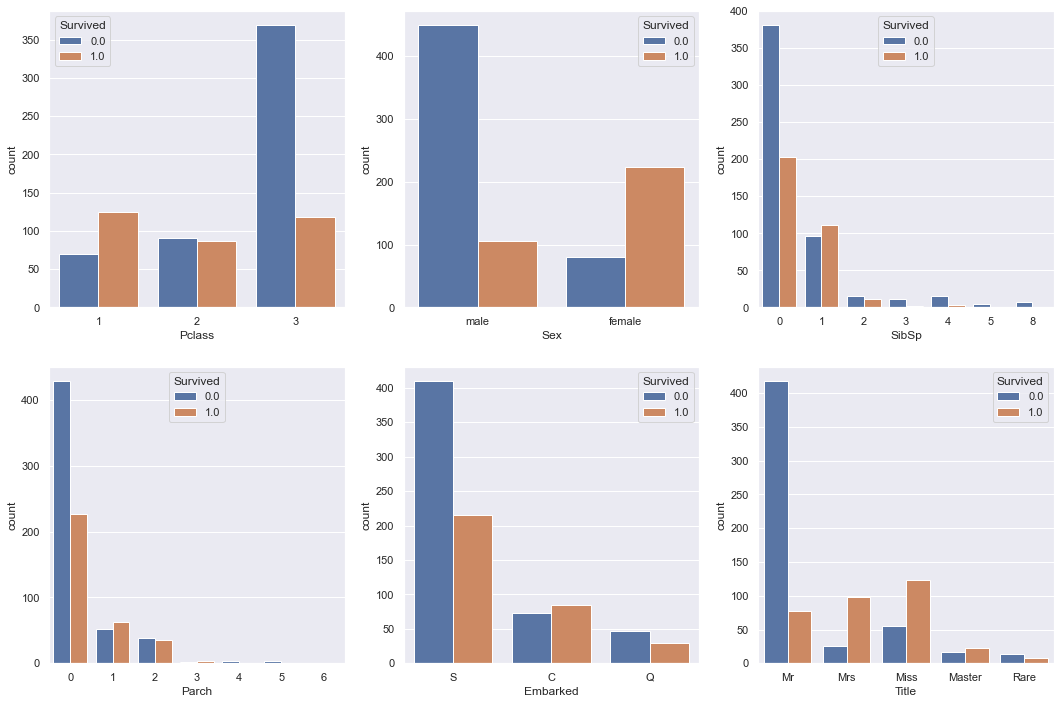

In [17]:
# See the impact of each feature on survivorship
sns.set(rc={'figure.figsize':(18,12)})
fig,axes = plt.subplots(2,3)
sns.countplot(data = data[:len(train)], x = "Pclass", hue = "Survived", ax = axes[0][0])
sns.countplot(data = data[:len(train)], x = "Sex", hue = "Survived", ax = axes[0][1])
sns.countplot(data = data[:len(train)], x = "SibSp", hue = "Survived", ax = axes[0][2])
sns.countplot(data = data[:len(train)], x = "Parch", hue = "Survived", ax = axes[1][0])
sns.countplot(data = data[:len(train)], x = "Embarked", hue = "Survived", ax = axes[1][1])
sns.countplot(data = data[:len(train)], x = "Title", hue = "Survived", ax = axes[1][2])

In [18]:
data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.641026
1,2,0.488764
2,3,0.242300


In [19]:
data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.536232
2,2,0.423077
0,0,0.347603
4,4,0.166667
3,3,0.153846
5,5,0.000000
6,8,0.000000


In [20]:
data["SibSp"][(data['SibSp'] == 5 )| (data['SibSp'] == 8 )] = 5
data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.536232
2,2,0.423077
0,0,0.347603
4,4,0.166667
3,3,0.153846
5,5,0.000000


In [21]:
data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.547826
2,2,0.480000
0,0,0.346037
5,5,0.200000
4,4,0.000000
6,6,0.000000
7,9,NaN


In [22]:
data["Parch"][(data['Parch'] == 4 )| (data['Parch'] == 6 ) | (data['Parch'] == 9 ) ] = 4
data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.547826
2,2,0.480000
0,0,0.346037
5,5,0.200000
4,4,0.000000


In [23]:
data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.535032
1,Q,0.389610
2,S,0.345048


In [24]:
data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.790323
1,Miss,0.691011
0,Master,0.575000
4,Rare,0.363636
2,Mr,0.157258


In [26]:
# pd.set_option("display.max_rows", None, "display.max_columns", None)
# data[['Age', 'Survived']].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

<AxesSubplot:xlabel='Age', ylabel='Density'>

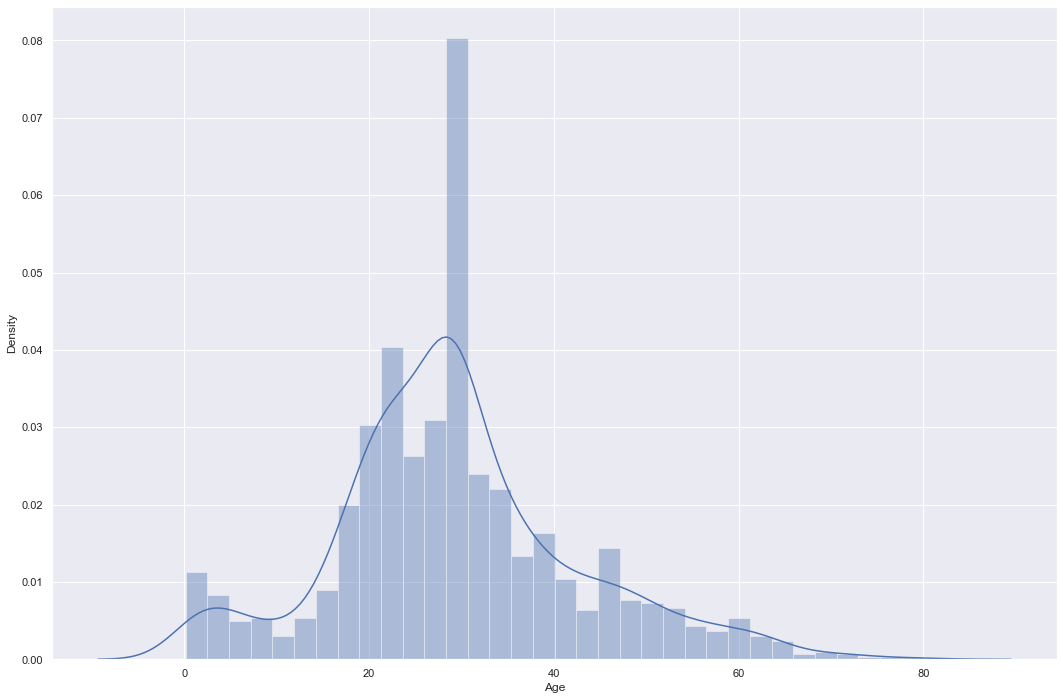

In [27]:
sns.distplot(data['Age'])

## Feature Standardization and Encoding

In [28]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()

In [29]:
data[["Age","Fare"]] = s.fit_transform(data[["Age","Fare"]])

In [31]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
categorical_col = ['Pclass','Sex','Embarked','Title']
for col in categorical_col:
    data[col] = l.fit_transform(data[col])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.0,2,1,-0.557045,1,0,-0.994816,2,2
1,1.0,0,0,0.653718,1,0,1.485806,0,3
2,1.0,2,0,-0.254354,0,0,-0.904931,2,1
3,1.0,0,0,0.426700,1,0,1.154628,2,3
4,0.0,2,1,0.426700,0,0,-0.889035,2,2


In [32]:
# One-hot encoding of categorical features
data = pd.get_dummies(data, columns = ['Pclass','Sex','SibSp','Parch','Embarked','Title'], drop_first = True)
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Sex_1,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Parch_2,Parch_3,Parch_4,Parch_5,Embarked_1,Embarked_2,Title_1,Title_2,Title_3,Title_4
0,0.0,-0.557045,-0.994816,0,1,1,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,1.0,0.653718,1.485806,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.0,-0.254354,-0.904931,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,1.0,0.426700,1.154628,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0.0,0.426700,-0.889035,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [33]:
# Separate the training set and the test set
data_train = data[:len(train)]
data_test = data[len(train):]

In [34]:
X_train, y_train, X_test = data_train.drop(['Survived'], axis = 1), data_train['Survived'], data_test.drop(['Survived'], axis = 1)
X_train.shape, y_train.shape, X_test.shape

((860, 21), (860,), (418, 21))

# Machine learning

## Import libraries used in machine learning

In [35]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, 
                              AdaBoostClassifier)

In [36]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
pd.Series(RF.feature_importances_, index = X_train.columns)

Age           0.230747
Fare          0.253953
Pclass_1      0.017652
Pclass_2      0.065718
Sex_1         0.107714
SibSp_1       0.023593
SibSp_2       0.005827
SibSp_3       0.010364
SibSp_4       0.006377
SibSp_5       0.006464
Parch_1       0.015163
Parch_2       0.013928
Parch_3       0.001177
Parch_4       0.003066
Parch_5       0.002047
Embarked_1    0.011330
Embarked_2    0.021409
Title_1       0.044761
Title_2       0.116718
Title_3       0.033796
Title_4       0.008196
dtype: float64

In [37]:
lr = LogisticRegression(solver = 'sag')
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.8267441860465117

In [38]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
mlp.score(X_train, y_train)

0.8569767441860465

In [39]:
param = [
    {'n_neighbors': range(1, 20, 1)}
]

knn = KNeighborsClassifier()
gs_knn = GridSearchCV(knn, param, cv = 10, n_jobs = -1)
gs_knn.fit(X_train, y_train)

knn_best = gs_knn.best_estimator_
gs_knn.best_estimator_, gs_knn.score(X_train, y_train)

(KNeighborsClassifier(n_neighbors=8), 0.85)

In [40]:
param = [
    {
        'kernel': ['rbf'],
        'C': [0.1, 0.5, 1, 2, 3, 4, 5], 
        'gamma': [0.1, 0.5, 1, 2, 3, 4, 5, 10, 15, 20, 25, 30]
    }
]

svc = SVC(probability = True)
gs_svc = GridSearchCV(svc, param, cv =10, n_jobs = -1)
gs_svc.fit(X_train, y_train)
svc_best = gs_svc.best_estimator_
gs_svc.best_estimator_, gs_svc.score(X_train, y_train)

(SVC(C=4, gamma=0.1, probability=True), 0.8441860465116279)

In [41]:
param = [
    {
        'criterion': ['gini', 'entropy'],
        'max_depth': range(2, 20, 2),
        'max_leaf_nodes': range(2, 30, 2),
    }
]

dt = DecisionTreeClassifier()
gs_dt = GridSearchCV(dt, param, cv = 10, n_jobs = -1)
gs_dt.fit(X_train, y_train)

dt_best = gs_dt.best_estimator_
gs_dt.best_estimator_, gs_dt.score(X_train, y_train)

(DecisionTreeClassifier(max_depth=4, max_leaf_nodes=8), 0.8395348837209302)

In [42]:
param = [
    {'n_estimators': [50, 100, 150, 200, 300, 400]}
]
ada = AdaBoostClassifier()
gs_ada = GridSearchCV(ada, param, cv = 10, n_jobs = -1)
gs_ada.fit(X_train, y_train)

ada_best = gs_ada.best_estimator_
gs_ada.best_estimator_, gs_ada.score(X_train, y_train)

(AdaBoostClassifier(n_estimators=200), 0.858139534883721)

In [43]:
param = [
    {'n_estimators': range(10, 50, 5), 
     'max_depth': range(2, 20, 2),
     'max_leaf_nodes': range(5, 30, 5),
    }
]

gb = GradientBoostingClassifier()
gs_gb = GridSearchCV(gb, param, cv = 10, n_jobs = -1)
gs_gb.fit(X_train, y_train)

gb_best = gs_gb.best_estimator_
gs_gb.best_estimator_, gs_gb.score(X_train, y_train)

(GradientBoostingClassifier(max_depth=12, max_leaf_nodes=20, n_estimators=30),
 0.9197674418604651)

In [44]:
rf_best = RandomForestClassifier(max_depth = 16, max_leaf_nodes = 25, n_estimators = 500)
rf_best.fit(X_train,y_train)
rf_best.score(X_train, y_train)

0.8593023255813953

In [45]:
vc = VotingClassifier(estimators = [('rf', rf_best), ('svc', svc_best), ('lr', lr), 
                                    ('mlp', mlp),('knn', knn_best),
                                    ('ada', ada_best), ('dt', dt_best), ('gb', gb_best)], 
                                    voting = 'soft', n_jobs = -1)
vc.fit(X_train, y_train)
vc.score(X_train, y_train)

0.8662790697674418

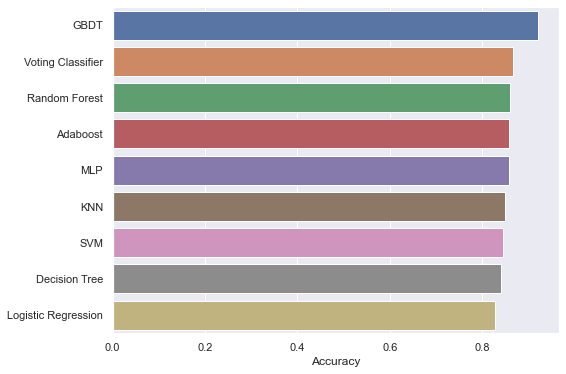

In [46]:
m = [lr, mlp, knn_best, svc_best, dt_best, ada_best, gb_best, rf_best, vc]
n = ['Logistic Regression', 'MLP', 'KNN', 'SVM', 'Decision Tree', 'Adaboost', 'GBDT', 'Random Forest', 'Voting Classifier']
p = dict()
for i in range(len(m)):
    pred = m[i].score(X_train, y_train)
    p[n[i]] = pred

p = dict(sorted(p.items(), key = lambda x: x[1], reverse = True))
sns.set(rc={'figure.figsize':(8,6)})
plt.xlabel('Accuracy')
sns.barplot(x = list(p.values()), y = list(p.keys()), orient = 'h');

In [49]:
predictions = lr.predict(X_test).astype(np.uint8)
sub = pd.concat([test['PassengerId'], pd.Series(predictions)],axis=1).reset_index(drop = True)
sub.columns = ['PassengerId','Survived']
sub.to_csv('submission_8_lr.csv', index = False)
pd.value_counts(sub['Survived'])

0    248
1    170
Name: Survived, dtype: int64

In [50]:
predictions = gb_best.predict(X_test).astype(np.uint8)
sub = pd.concat([test['PassengerId'], pd.Series(predictions)],axis=1).reset_index(drop = True)
sub.columns = ['PassengerId','Survived']
sub.to_csv('submission_8_gb_best.csv', index = False)
pd.value_counts(sub['Survived'])

0    273
1    145
Name: Survived, dtype: int64